<IPython.core.display.Javascript object>


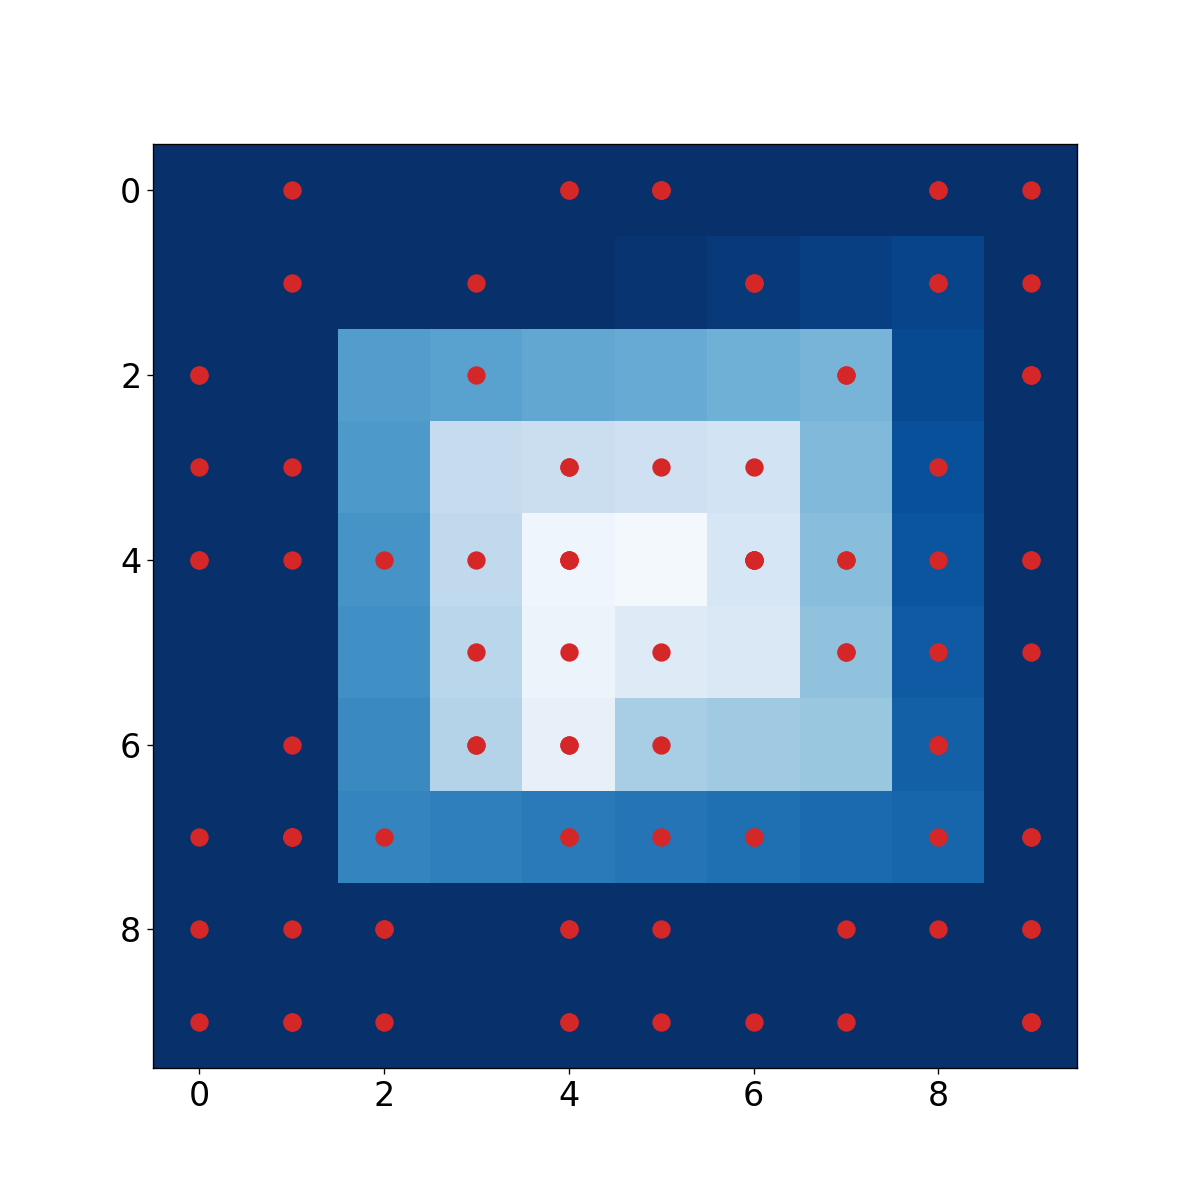

interactive(children=(IntSlider(value=0, description='empty_x', max=9), IntSlider(value=0, description='empty_…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [1]:
%matplotlib notebook
import ipywidgets as ipw 
from IPython.display import clear_output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time
class livePlot(): 
    def __init__(self,map_data, width = 10, length = 10):
        self.width = width
        self.length = length
        self.num_scat = 100
        self.data=map_data
        self.max_val = self.data.max().max()
        plt.rcParams["font.size"] = 20
        
        self.fig, self.ax = plt.subplots(figsize = (10, 10))
        
        self.im = self.ax.imshow(self.data, norm = plt.cm.colors.Normalize(0,self.max_val), cmap = "Blues")  
        self.lst1, self.lst2= [random.randint(0, self.width - 1) for i in range(self.num_scat)],\
            [random.randint(0,self.length - 1) for i in range(self.num_scat)]
        self.scat, = self.ax.plot(self.lst1, self.lst2, marker = "o", ls = " ", color = "C3", markersize = 10)
        
    
    def update(self,empty_x, empty_y):
        def reset_map():
            for key in self.data:
                self.data[key] = self.max_val
        def increment_patches():
            for key, val in self.data.items():
                for i in range(len(val)):
                    if val[i] < self.max_val:
                        self.data[key].iloc[i] += 1

        self.data[empty_x].loc[empty_y] = 0
        increment_patches()
        self.im.set_data(self.data)
            
        self.scat.set_data([random.randint(0, self.width - 1) for i in range(self.num_scat)],\
            [random.randint(0,self.length - 1) for i in range(self.num_scat)])
        
width = 10
length = width
max_val = 50
map_data = pd.DataFrame({i:{j:random.randint(0,max_val) for j in range(width)} for i in range(length)})
plot = livePlot(map_data, length = length, width = width)
ipw.interact(plot.update,
             empty_x = ipw.widgets.IntSlider(value = 0,
                                             min = 0,
                                             max = len(plot.data.keys())-1,
                                             step = 1),
             empty_y = ipw.widgets.IntSlider(value = 0,
                                             min = 0,
                                             max = len(plot.data.index)-1,
                                             step = 1))